In [53]:
# To add plots to your Jupyter notebook, use the standard solution %matplotlib inline.
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [54]:
# Split data set into 3 data frames: Urban, Suburban, Rural.
urban_data = pyber_data[pyber_data["type"] == "Urban"]
suburban_data = pyber_data[pyber_data["type"] == "Suburban"]
rural_data = pyber_data[pyber_data["type"] == "Rural"]

# Obtain X and Y coordinates for each city type.
# Urban data: Calculate ride count (x), average fare (y), number of drivers (z).
x_urban = urban_data.groupby(["city"]).count()["ride_id"]
y_urban = urban_data.groupby(["city"]).mean()["fare"]
z_urban = urban_data.groupby(["city"]).mean()["driver_count"]

# Suburban data: Calculate ride count (x), average fare (y), number of drivers (z).
x_suburban = suburban_data.groupby(["city"]).count()["ride_id"]
y_suburban = suburban_data.groupby(["city"]).mean()["fare"]
z_suburban = suburban_data.groupby(["city"]).mean()["driver_count"]

# Rural data: Calculate ride count (x), average fare (y), number of drivers (z).
x_rural = rural_data.groupby(["city"]).count()["ride_id"]
y_rural = rural_data.groupby(["city"]).mean()["fare"]
z_rural = rural_data.groupby(["city"]).mean()["driver_count"]

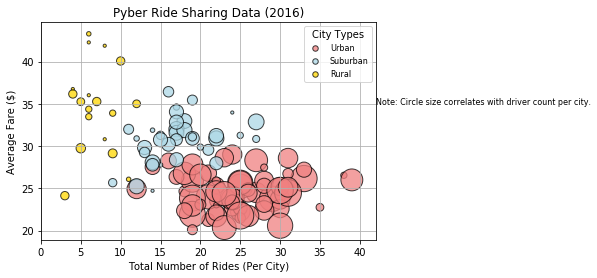

In [55]:
# Build the scatter plots for each city type.

plt.scatter(x_urban, y_urban, label = "Urban", s=z_urban * 10, color=["lightcoral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=z_suburban * 10, color=["lightblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=z_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlim((0,42))

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize = 8)

# Save figure 
plt.savefig("fig1.png")

plt.show()

## Total Fares by City Type

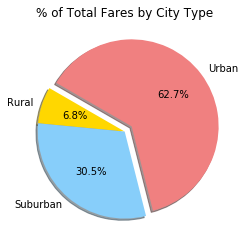

In [56]:
# Calculate Type Percents
type_percents = 100 * pyber_data.groupby(["type"]).sum()["fare"] / pyber_data["fare"].sum()

# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("fig2.png")

plt.show()


## Total Rides by City Type

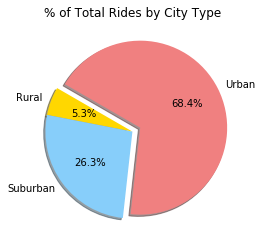

In [57]:
# Calculate Type Percents
type_percents = 100 * pyber_data.groupby(["type"]).count()["ride_id"] / pyber_data["ride_id"].count()

# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("fig3.png")

plt.show()


## Total Drivers by City Type

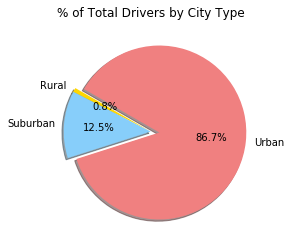

In [58]:
# Calculate Type Percents
type_percents = 100 * pyber_data.groupby(["type"]).sum()["driver_count"] / pyber_data["city"].count()

# Build Pie Chart
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("fig4.png")

plt.show()


In [44]:
# Show Figure
plt.show()